In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

/home/twright/Drive/Documents/PhD/Notebooks/notebooks/genetic_oscillator_benchmarking.py:110: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Properties

In [2]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [3]:
Q = Atomic(var("x4") > 1/50); Q

Atomic(x4 > (1/50))

In [3]:
I = RIF(3, 3.5)

In [4]:
%%time

reach = system.reach(
    5, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=250,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
CPU times: user 47.8 s, sys: 

var_id_x = 3
var_id_y = 5


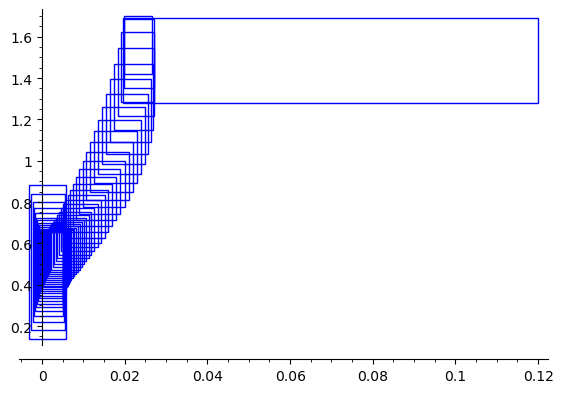

In [5]:
p = reach.sage_interval_plot("x4", "x6")
p.set_aspect_ratio(1/20)
p

In [6]:
def prop(k):
    return (500/4)**2*(var("x4") - 0.003)**2 + 3*(var("x6") - 0.5)^2 < k

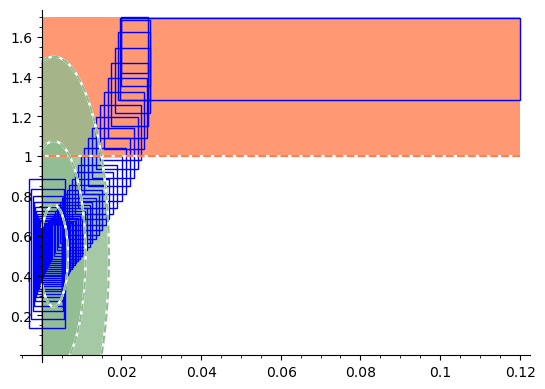

In [7]:
q = p
q += region_plot(var("x6") > 1,
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 incol='coral',
                 alpha=0.8,
                 bordercol='coral',
                 borderstyle='--')
q += region_plot(prop(1),
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 incol='darkseagreen',
                 alpha=0.8,
                 bordercol='darkseagreen',
                 borderstyle='--')
q += region_plot(prop(3),
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 alpha=0.8,
                 incol='darkseagreen',
                 bordercol='darkseagreen',
                 borderstyle='--')
q += region_plot(prop(0.2),
                 (x4, 0, 0.12),
                 (x6, 0, 1.7),
                 alpha=0.8,
                 incol='darkseagreen',
                 bordercol='darkseagreen',
                 borderstyle='--')
q.set_aspect_ratio(1/20)
q

## Launch Runs

In [8]:
num_runs = 1
duration = 2

In [9]:
results = []

In [10]:
srange(0.2, 3, 0.2)

[0.200000000000000,
 0.400000000000000,
 0.600000000000000,
 0.800000000000000,
 1.00000000000000,
 1.20000000000000,
 1.40000000000000,
 1.60000000000000,
 1.80000000000000,
 2.00000000000000,
 2.20000000000000,
 2.40000000000000,
 2.60000000000000,
 2.80000000000000]

In [11]:
resultP = gen_results(
    1,
    P,
    5,
    task_description=f'P = {P}',
    use_masks=False,
    symbolic_composition=False,
)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
crude_roots = False
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 48

In [12]:
resultP

[{'prop': Atomic(x6 > 1),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': False},
  'future': <Future at 0x7f11b1559760 state=running>}]

In [13]:
sigP = resultP[0]['future'].result()[0]

In [17]:
results_Q2 = [gen_results(
    1,
    Atomic(prop(k)),
    5,
    task_description=f'k = {k}',
    use_masks=False,
    symbolic_composition=True,
) for k in srange(0, 2, 0.05)]

In [18]:
results_Q3 = results_Q2[:-5]; results_Q3

[[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0b370 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0500000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0bd90 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.100000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ab867c0 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.150000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0fd00 state=running>}],
 [{'prop': Atom

In [14]:
import pickle

In [59]:
results_Q4_no_symb

NameError: name 'results_Q4_no_symb' is not defined

In [36]:
results_Q3

[[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0b370 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0500000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0bd90 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.100000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ab867c0 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.150000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': T

In [26]:
def extract_result(d):
    return {
        'prop': d['prop'],
        'duration': d['duration'],
        'kwargs': d['kwargs'],
        'result': d['future'].result(),
    }

def extract_results(ds):
    return list(map(extract_result, (d[0] for d in ds)))

In [51]:
pickle.dump(extract_results(results_Q3), open('data/results_Q3.pkl', 'wb'))

KeyboardInterrupt: 

In [29]:
with open('data/results_Q4_2.pkl', 'wb') as f:
    pickle.dump(extract_results(results_Q4), f)

In [16]:
with open('data/results_Q4_2.pkl', 'rb') as f:
    results_Q4 = pickle.load(f)

<ipython-input-16-73d9832c7e08>:2: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  results_Q4 = pickle.load(f)


In [17]:
results_Q4

[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'result': (Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.0507754219204091], False), ([3.0510000000000787 .. 3.0530508215383972], False), ([4.3290000000001276 .. 4.3309560426846022], False), ([4.3320000000001277 .. 5.0000000000000000], False)], mask=None),
   629.2475924491882,
   <flowstar.instrumentation.AggregateMetric object at 0x7f11d4e20bc0>)},
 {'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0100000000000000),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'result': (Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.0359999999995738], False), ([4.5480000000001359 .. 4.5499066061311720], False), ([4.5510000000001360 .. 5.0000000000000000], False)], mask=None),
   631.4493238925934

In [31]:
with open('data/results_Q4_2_no_symb.pkl', 'wb') as f:
    pickle.dump(extract_results(results_Q4_no_symb), f)

KeyboardInterrupt: 

In [19]:
results_Q4 = [gen_results(
    1,
    Atomic(prop(k)),
    5,
    task_description=f'k = {k}',
    use_masks=False,
    symbolic_composition=True,
) for k in srange(0, 0.5, 0.01)]

In [11]:
results_Q4 = []
results_Q4_no_symb = []

In [13]:
def gen_Q4():
    #fut.wait(futures(sum(results_Q3, [])))
    #Notify.Notification.new("Benchmark run done!", "Q3").show()
    #restart_pool()
    results_Q4.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=True,
    ) for k in srange(0, 0.5, 0.01)])
    fut.wait(futures(sum(results_Q4, [])))
    try:
        Notify.Notification.new("Benchmark run done!", "Q4 Stage 1").show()
    except:
        pass
    restart_pool()
    results_Q4.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=True,
    ) for k in srange(0.51, 1.0, 0.01)])
    fut.wait(futures(sum(results_Q4, [])))
    try:
        Notify.Notification.new("Benchmark run done!", "Q4 Stage 2").show()
    except:
        pass
    restart_pool()
    results_Q4_no_symb.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=False,
    ) for k in srange(0, 0.5, 0.01)])
    fut.wait(futures(sum(results_Q4_no_symb, [])))
    try:
        Notify.Notification.new("Benchmark run done!", "Q4 nosymb Stage 1").show()
    except:
        pass
    restart_pool()
    results_Q4_no_symb.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=False,
    ) for k in srange(0.51, 1.0, 0.01)])
    fut.wait(futures(sum(results_Q4_no_symb, [])))
    try:
        Notify.Notification.new("Benchmark run done!", "Q4 nosymb Stage 2").show()
    except:
        pass
    restart_pool()

In [12]:
Notify.init("LBUC Benchmarking")

True

In [69]:
def gen_Q4():
    restart_pool()
    results_Q4.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=True,
    ) for k in srange(0, 0.5, 0.01)])
    fut.wait(futures(sum(results_Q4, [])))
    Notify.Notification.new("Benchmark run done!", "Q4 Stage 1").show()
    restart_pool()
    results_Q4.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=True,
    ) for k in srange(0.51, 1.0, 0.01)])
    fut.wait(futures(sum(results_Q4, [])))
    Notify.Notification.new("Benchmark run done!", "Q4 Stage 2").show()
    restart_pool()
    results_Q4_no_symb.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=False,
    ) for k in srange(0, 0.5, 0.01)])
    fut.wait(futures(sum(results_Q4_no_symb, [])))
    Notify.Notification.new("Benchmark run done!", "Q4 nosymb Stage 1").show()
    restart_pool()
    results_Q4_no_symb.extend([gen_results(
        1,
        Atomic(prop(k)),
        5,
        task_description=f'k = {k}',
        use_masks=False,
        symbolic_composition=False,
    ) for k in srange(0.51, 1.0, 0.01)])
    fut.wait(futures(sum(results_Q4_no_symb, [])))
    Notify.Notification.new("Benchmark run done!", "Q4 nosymb Stage 2").show()
    restart_pool()

In [18]:
tasks = thread_pool.submit(gen_Q4)

In [24]:
tasks

<Future at 0x7f04cf1d3e80 state=running>

In [25]:
results_Q4

[[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f04cf1d3a30 state=finished returned tuple>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0100000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f04d4812c70 state=finished returned tuple>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0200000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f04f071d2b0 state=finished returned tuple>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0300000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future a

In [16]:
tasks.exception()

NameError("name 'prop' is not defined")

In [24]:
results_Q3

[[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0b370 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0500000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ad0bd90 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.100000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f045ab867c0 state=finished raised KeyboardInterrupt>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.150000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': T

In [20]:
results_Q3 = [r for r in results_Q3 if r[0]['future'].exception() is None]

KeyboardInterrupt: 

In [23]:
sum(results_Q4, [])

[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'future': <Future at 0x7f04582fef70 state=pending>},
 {'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0100000000000000),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'future': <Future at 0x7f045828f100 state=pending>},
 {'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0200000000000000),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'future': <Future at 0x7f045828f790 state=pending>},
 {'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0300000000000000),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'future': <Future at 0x7f045828fe80 state=pending>},
 {'prop': Atomic(15625*(x4 - 0.00

In [99]:
futures(sum(results_Q3, []))

[<Future at 0x7f79ff4bb460 state=finished returned tuple>,
 <Future at 0x7f79ff4bbeb0 state=finished returned tuple>,
 <Future at 0x7f79ff1836d0 state=finished returned tuple>,
 <Future at 0x7f79ff183dc0 state=finished returned tuple>,
 <Future at 0x7f79ff183760 state=finished returned tuple>,
 <Future at 0x7f79ff183310 state=finished returned tuple>,
 <Future at 0x7f79ff183fd0 state=finished returned tuple>,
 <Future at 0x7f79ff183e50 state=finished returned tuple>,
 <Future at 0x7f79ff117f40 state=finished returned tuple>,
 <Future at 0x7f79ff117fd0 state=finished returned tuple>,
 <Future at 0x7f79ff626640 state=finished returned tuple>,
 <Future at 0x7f79ff626520 state=finished returned tuple>,
 <Future at 0x7f79ff626ca0 state=finished returned tuple>,
 <Future at 0x7f79ff949190 state=finished returned tuple>,
 <Future at 0x7f79ff521190 state=finished returned tuple>,
 <Future at 0x7f79ff521af0 state=finished returned tuple>,
 <Future at 0x7f79ff200820 state=finished returned tuple

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


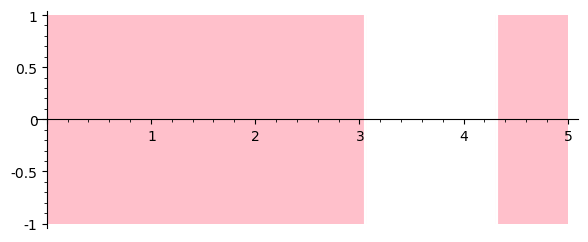

In [65]:
futures(sum(results_Q2, []))[0].result()[0].plot()

In [66]:
futures(sum(results_Q2, []))[0].result()[0]

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.0507754219204091], False), ([3.0510000000000787 .. 3.0530508215383972], False), ([4.3290000000001276 .. 4.3309560426846022], False), ([4.3320000000001277 .. 5.0000000000000000], False)], mask=None)

In [69]:
from ulbc.interval_utils import fintervals

In [72]:
from flowstar.observers import PolyObserver

In [76]:
reach.system

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 50*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [78]:
o = PolyObserver(reach.system.R((500/4)**2*(x4 - 0.003)**2 + 3*(x6 - 0.5)^2), reach, symbolic_composition=True)

PolyObserver(15625*x4^2 + 3*x6^2 - 93.75000000000001?*x4 - 3*x6 + 0.8906250000000001?, <flowstar.reachability.Reach object at 0x7f7a01ba9e40>, None, symbolic_composition=True, tentative_unpreconditioning=False, mask=None)


In [79]:
o.roots()

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 520.62 seconds
roots = [[3.0507754219204090 .. 3.0510000000000788], [3.0530508215383971 .. 4.3290000000001277], [4.3309560426846021 .. 4.3320000000001278]]


[3.051?, 4.?, 4.34?]

In [70]:
fintervals(reach(RIF(3.05)))

'[[1.0552648895266043 .. 1.1422798186190908], [0.60153725336467267 .. 1.0501737260579787], [0.00088652090930122461 .. 0.0015687709450000788], [0.0015879494915523031 .. 0.0076729458269372692], [0.053256226522996545 .. 0.057865455659340954], [0.44640163114682945 .. 0.66784238420897247], [1.2219693032181235 .. 1.6879784526682516], [1.7510068664108746 .. 2.3753494207930977], [2.0003845413446099 .. 2.4960542033915081]]'

In [84]:
[
    res.result()[0]
    for res in futures(sum(results_Q2[:-5], []))
]

[Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.0507754219204091], False), ([3.0510000000000787 .. 3.0530508215383972], False), ([4.3290000000001276 .. 4.3309560426846022], False), ([4.3320000000001277 .. 5.0000000000000000], False)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8869999999998537], False), ([1.8900000000000345 .. 2.7503274704892138], False), ([2.7510000000000673 .. 2.7526747862237091], False), ([2.8020000000000693 .. 2.8074229839716467], False), ([2.8080000000000695 .. 2.8096453427828863], False), ([3.3840000000000913 .. 3.3860757990098996], True), ([3.3870000000000914 .. 4.8837808423666776], True), ([4.8840000000001486 .. 4.8861230487497780], True)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.5587382005973685], False), ([2.5590000000000601 .. 2.5610864290008171], False), ([2.5650000000000603 .. 2.5707741062472978], False), ([2.5710000000000605 ..

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


Animation with 50 frames
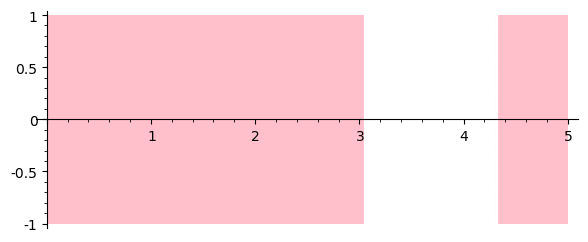

In [53]:
animate([
    res.result()[0].plot()
    for res in futures(sum(results_Q4, []))
])

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


Animation with 30 frames
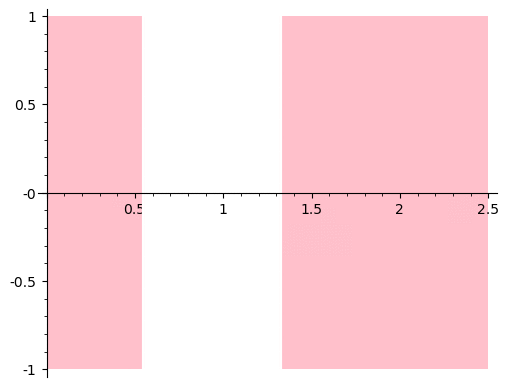

In [139]:
animate([
    res.result()[0].G(RIF(2.5, 3)).plot()
    for res in futures(sum(results_Q3[0:30], []))
])

In [144]:
results_Q4

[[{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.000000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f79cc33b9a0 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0100000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f79fc43d3d0 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0200000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f79ff844460 state=running>}],
 [{'prop': Atomic(15625*(x4 - 0.00300000000000000)^2 + 3*(x6 - 0.500000000000000)^2 < 0.0300000000000000),
   'duration': 5,
   'kwargs': {'use_masks': False, 'symbolic_composition': True},
   'future': <Future at 0x7f79ff844ee0 state=running>}],
 [{'prop': At

In [ ]:
animate([
    res.result()[0].G(RIF(2.5, 3)).plot()
    for res in futures(sum(results_Q4, []))
])

In [48]:
from sage.repl.ipython_kernel.interact import interact

In [120]:
@interact
def _(i=slider(0, len(results_Q3) - 1)):
    k = list(srange(0, 10, 0.05))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q3, []))[i].result()[0]
    return (~sigQ).plot()

Interactive function <function _ at 0x7f79ff65f550> with 1 widget
  i: TransformIntSlider(value=0, description…

In [1]:
@interact
def _(i=slider(0, len(results_Q3) - 1),
      auto_update=False):
    k = list(srange(0, 10, 0.05))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q3, []))[i].result()[0]
    sigP.plot().show()
    (sigQ).F(RIF(2.5,3)).plot().show()
    (sigP | (sigQ).G(RIF(2.5,3))).plot().show()

NameError: name 'results_Q3' is not defined

In [146]:
restart_pool()